In [4]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [5]:
import numpy as np
import pandas as pd

In [6]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [8]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [10]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [17]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis using pandas

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

weather_data = pd.read_sql("SELECT * FROM measurement", engine)
weather_data.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [18]:
# Latest Date
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
latest_date

'2017-08-23'

In [19]:
end_date = latest_date

In [20]:
end_date

'2017-08-23'

In [26]:
start_date = dt.datetime.strptime(end_date, '%Y-%m-%d') - dt.timedelta(days=365)

In [27]:
start_date

datetime.datetime(2016, 8, 23, 0, 0)

In [29]:
start_date = start_date.strftime('%y-%m-%d')
start_date

'16-08-23'

In [30]:
start_date = "2016-08-23"
end_date = "2017-08-23"

weather_data_one_year = weather_data[weather_data["date"].between(start_date, end_date)]
weather_data_one_year.head()

,id,station,date,prcp,tobs
2363,2364,USC00519397,2016-08-23,0.00,81.0
2364,2365,USC00519397,2016-08-24,0.08,79.0
2365,2366,USC00519397,2016-08-25,0.08,80.0
2366,2367,USC00519397,2016-08-26,0.00,79.0
2367,2368,USC00519397,2016-08-27,0.00,77.0


In [31]:
len(weather_data_one_year)

2230

In [32]:
precipitation_data = weather_data_one_year[["prcp", "date"]]
precipitation_data.set_index('date', inplace=True)
# Sort the dataframe by date
precipitation_data_sorted = precipitation_data.sort_values('date', ascending=True )
precipitation_data_sorted.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


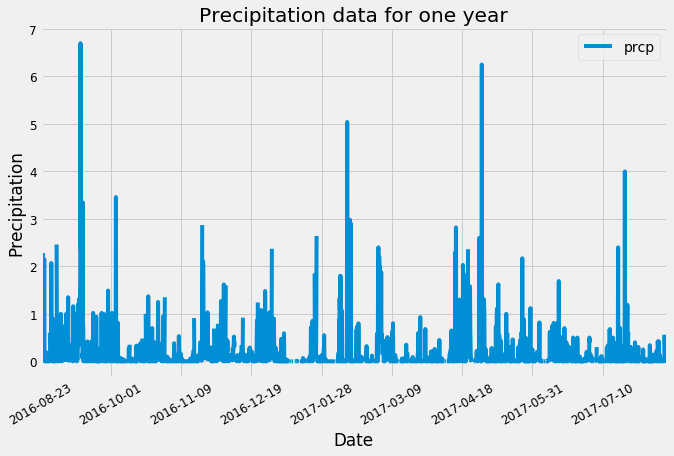

In [33]:

# Use Pandas Plotting with Matplotlib to plot the data
# Rotate the xticks for the dates
precipitation_chart = precipitation_data_sorted.plot(kind = "line",grid=True, figsize=(10,6), rot=30, x_compat=True, fontsize=12, title = "Precipitation data for one year")
precipitation_chart.set_xlabel("Date")
precipitation_chart.set_ylabel("Precipitation")
plt.show()

In [34]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_data_sorted.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [37]:
# Design a query to show how many stations are available in this dataset?

station_data = pd.read_sql("SELECT * FROM station", engine)
station_data


,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [38]:
station_data["station"].count()

9

In [42]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
weather_data["station"].value_counts()

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [44]:
weather_data_station_counts = weather_data["station"].value_counts()

In [45]:
# The station with maximum number of temperature observations
active_station = weather_data_station_counts.index[0]
active_station

'USC00519281'

In [46]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
weather_data_active_station = weather_data.loc[(weather_data["station"] == active_station), :]
Lowest_temperature = weather_data_active_station["tobs"].min()
Highest_temperature = weather_data_active_station["tobs"].max()
Average_temperature =  weather_data_active_station["tobs"].mean()
print(f"For the most active station The lowest temperature, The Highest temperature, The Average temperature is {Lowest_temperature} , {Highest_temperature}, {Average_temperature}")


For the most active station The lowest temperature, The Highest temperature, The Average temperature is 54.0 , 85.0, 71.66378066378067


In [47]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
start_date = "2016-08-23"
end_date = "2017-08-23"

weather_data_one_year = weather_data[weather_data["date"].between(start_date, end_date)]
weather_data_active_station_one_year = weather_data_one_year.loc[(weather_data_one_year["station"] == active_station), :]



In [48]:
temperature_data = weather_data_active_station_one_year[["tobs", "date"]]
x_data = temperature_data["tobs"]

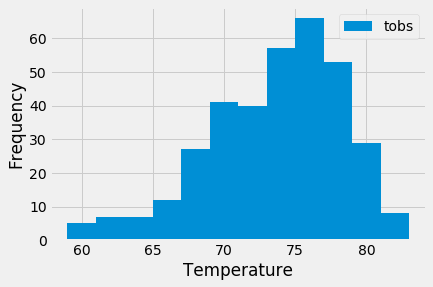

In [49]:
plt.hist(x_data, 12, label = "tobs") 
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(loc=1, prop={'size': 14})
plt.show()

In [50]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [51]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2017-02-28', '2017-03-05'))

[(64.0, 72.02777777777777, 78.0)]


In [52]:
trip_results = calc_temps('2017-02-28', '2017-03-05')
trip_results

[(64.0, 72.02777777777777, 78.0)]

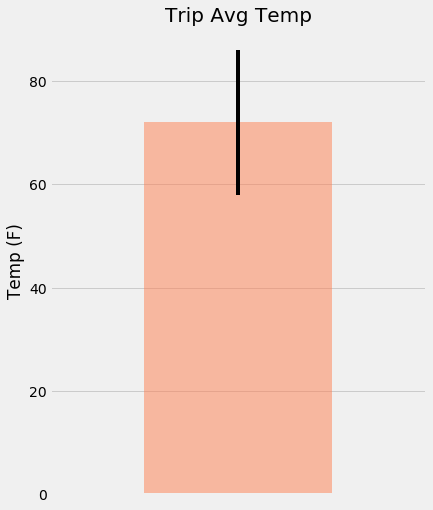

In [53]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
trip_df = pd.DataFrame(trip_results, columns=['Min Temp', 'Avg Temp', 'Max Temp'])
avg_temp = trip_df['Avg Temp']
min_max_temp = trip_df.iloc[0]['Max Temp'] - trip_df.iloc[0]['Min Temp']
temp_chart = avg_temp.plot(kind='bar', yerr=min_max_temp, grid = True, figsize=(6,8), alpha=0.5, color='coral')
temp_chart.set_title("Trip Avg Temp", fontsize=20)
temp_chart.set_ylabel("Temp (F)")
plt.xticks([])
plt.show()


In [54]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
trip_start_date = "2017-02-28"
trip_end_date = "2017-03-5"

weather_data_one_year_trip = weather_data_one_year[weather_data_one_year["date"].between(trip_start_date, trip_end_date)]
weather_data_one_year_trip_per_station = weather_data_one_year_trip.groupby("station")
weather_data_one_year_trip_per_station["prcp"].sum()



station
USC00513117    6.95
USC00514830    2.06
USC00516128    5.51
USC00517948    3.04
USC00519281    6.85
USC00519397    2.76
USC00519523    3.27
Name: prcp, dtype: float64

## Optional Challenge Assignment